In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

<h3>データの読み込み</h3>

In [2]:
df = pd.read_csv('./data/train.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,1,ASY,155,342,1,Normal,150,1,3.0,Flat,1
1,55,0,ATA,130,394,0,LVH,150,0,0.0,Up,0
2,47,1,NAP,110,0,1,Normal,120,1,0.0,Flat,1
3,34,1,ASY,115,0,1,Normal,154,0,0.2,Up,1
4,54,0,NAP,160,201,0,Normal,163,0,0.0,Up,0


<h3>分割</h3>

In [3]:
# ベースラインで使わない変数
x = df.drop(['ChestPainType','Cholesterol', 'RestingECG', 'ST_Slope', 'HeartDisease'], axis=1)
# 正解データ
y = df.HeartDisease
print('-'*20, ' ベースラインで使用した変数', '-'*20)
display(x)

# ベースラインはホールドアウト法（7:3）
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state = 42)

--------------------  ベースラインで使用した変数 --------------------


,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak
0,56,1,155,1,150,1,3.0
1,55,0,130,0,150,0,0.0
2,47,1,110,1,120,1,0.0
3,34,1,115,1,154,0,0.2
4,54,0,160,0,163,0,0.0
...,...,...,...,...,...,...,...
637,48,1,106,1,110,0,0.0
638,53,1,126,0,106,0,0.0
639,54,1,200,0,142,1,2.0
640,45,0,130,0,170,0,0.0


<h3>①SVC</h3>

In [4]:
# モデルはサポートベクターマシンのデフォルト
base_svc = SVC()
# モデル訓練
clf_svc = base_svc.fit(x_train, y_train)

In [5]:
# 訓練データで予測値を出力
train_pred_svc = base_svc.predict(x_train)
# 混合行列を表示
cm_svc = confusion_matrix(y_train, train_pred_svc)
print(cm_svc)
# 正解率を表示
print('-'*20, '正解率（訓練データ）', '-'*20)
accuracy_score(y_train, train_pred_svc)

[[131  79]
 [ 59 180]]
-------------------- 正解率（訓練データ） --------------------


0.6926503340757239

In [6]:
# 検証データで予測値を出力
test_pred_svc = base_svc.predict(x_test)
cm_t_svc = confusion_matrix(test_pred_svc, y_test)
print(cm_t_svc)
print('-'*20, '正解率（検証データ）', '-'*20)
accuracy_score(y_test, test_pred_svc)

[[39 25]
 [34 95]]
-------------------- 正解率（検証データ） --------------------


0.694300518134715

<h3>②決定木</h3>

In [10]:
# 決定木
base_tree = DecisionTreeClassifier(max_depth = 4)
# モデル訓練
clf_tree = base_tree.fit(x_train, y_train)

In [11]:
# 訓練データで予測値を出力
train_pred_tree = base_tree.predict(x_train)
# 混合行列を表示
cm_tree = confusion_matrix(y_train, train_pred_tree)
print(cm_tree)
# 正解率を表示
print('-'*20, '正解率（訓練データ）', '-'*20)
accuracy_score(y_train, train_pred_tree)

[[174  36]
 [ 42 197]]
-------------------- 正解率（訓練データ） --------------------


0.8262806236080178

In [12]:
# 検証データで予測値を出力
test_pred_tree = base_tree.predict(x_test)
cm_t_tree = confusion_matrix(test_pred_tree, y_test)
print(cm_t_tree)
print('-'*20, '正解率（検証データ）', '-'*20)
accuracy_score(y_test, test_pred_tree)

[[56 27]
 [17 93]]
-------------------- 正解率（検証データ） --------------------


0.772020725388601

<h3>shap検証</h3>

In [50]:
import shap
import matplotlib.pyplot as plt

X does not have valid feature names, but SVC was fitted with feature names
Using 449 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


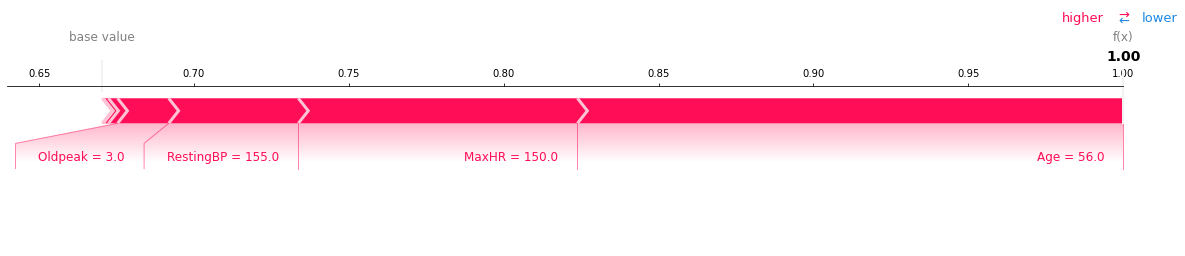

In [42]:
# SHAPのExplainerを用意
explainer = shap.KernelExplainer(clf.predict, x_train)

# 最初のデータに対して、shap_valuesを求める
shap_values_1 = explainer.shap_values(x_train.loc[[0]])
shap_values_1

shap.force_plot(explainer.expected_value, 
                shap_values_1, 
                x_train.loc[[0]], 
                matplotlib=True,
                )

  0%|          | 0/449 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

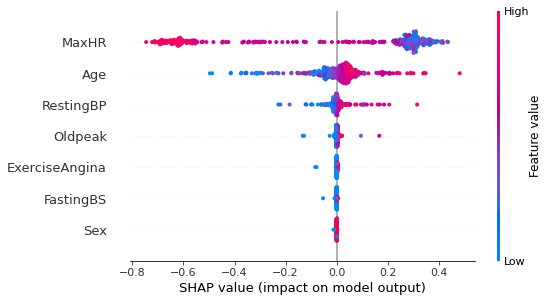

In [43]:
shap_values = explainer.shap_values(x_train)

shap.summary_plot(shap_values,
                 features = x_train,
                 class_names = ["0", "1"])